<a href="https://colab.research.google.com/github/MaiCongTuanKiet/Artificial-Intelligence/blob/main/tuan11CMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'So :8')

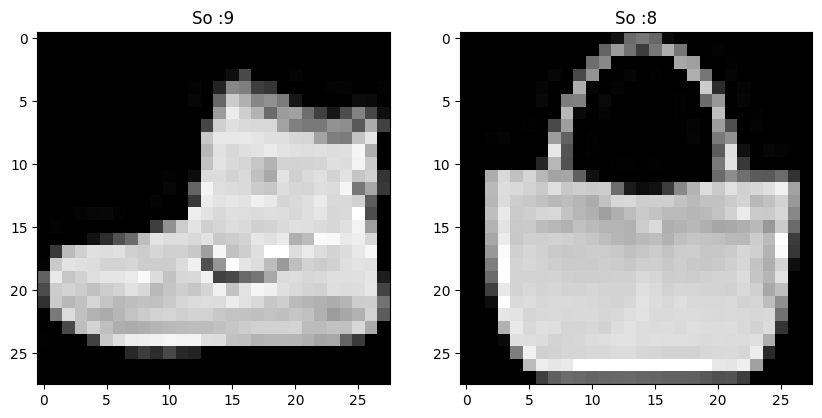

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = [10,10])
plt.subplot(121) #tuong duong (1,2,1)
plt.imshow(train_X[0], cmap = 'gray')
plt.title('So :{}'.format(train_Y[0]))

plt.subplot(122) #tuong duong (1,2,2)
plt.imshow(train_X[100], cmap = 'gray')
plt.title('So :{}'.format(train_Y[100]))

In [7]:
#reshape
train_X = train_X.reshape(60000, 28, 28, 1) # 1 la 1 kenh
test_X = test_X.reshape(10000, 28, 28, 1)

print(train_X.shape)
print(test_X.shape)

train_X = train_X.astype('float32')
train_X = train_X/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
from keras.utils import to_categorical #chuyen 1 vector sang 1 mang binary

train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [11]:
#Tao mo hinh
from keras.models import Sequential, Model
from keras import Input
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
from keras.optimizers import Adam

batch_size = 64 #lo^ hoc
epochs = 20
classes = 10 #phan ra 10 loai (lop)

In [15]:
from keras.layers.attention.multi_head_attention import activation
from keras.layers import Conv2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))


In [21]:
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.models import Sequential

model = Sequential()

#Bo 32
model.add((Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))) #32 so lan tich chap, bo filter 3,3, padding same la tich chap xong kich thuoc van nhu ban dau
model.add(LeakyReLU(alpha = 0.1)) #layer 1 (lop tich chap)
model.add(MaxPooling2D((2,2), padding = 'same')) #layer 2 (maxpooling)

#Bo 64
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#Bo 128
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


In [22]:
from keras.backend import categorical_crossentropy
#Dua vao ANN
model.add(Flatten()) #tấm ảnh phẳng
model.add(Dense(128, activation = 'linear')) #lớp ẩn có 128 lớp
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #output ra 10 lớp (classes = 10 ở trên)

In [23]:
from keras.losses import categorical_crossentropy

model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [24]:
#train
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
938/938 [==============================] - 87s 91ms/step - loss: 0.4337 - accuracy: 0.8432
Epoch 2/20
938/938 [==============================] - 85s 91ms/step - loss: 0.2745 - accuracy: 0.9010
Epoch 3/20
938/938 [==============================] - 85s 90ms/step - loss: 0.2286 - accuracy: 0.9155
Epoch 4/20
938/938 [==============================] - 84s 89ms/step - loss: 0.1974 - accuracy: 0.9273
Epoch 5/20
938/938 [==============================] - 84s 89ms/step - loss: 0.1702 - accuracy: 0.9385
Epoch 6/20
938/938 [==============================] - 82s 88ms/step - loss: 0.1501 - accuracy: 0.9449
Epoch 7/20
938/938 [==============================] - 82s 88ms/step - loss: 0.1302 - accuracy: 0.9509
Epoch 8/20
938/938 [==============================] - 83s 89ms/step - loss: 0.1111 - accuracy: 0.9589
Epoch 9/20
938/938 [==============================] - 83s 89ms/step - loss: 0.0940 - accuracy: 0.9649
Epoch 10/20
938/938 [==============================] - 84s 90ms/step - loss: 0.081